## AutoGluon

In [16]:
from autogluon.tabular import TabularPredictor


## Data Load

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split


In [18]:
preprocess_X = pd.read_csv('preprocessed_data//preprocess_X_data.csv',index_col=0)
preprocess_Y = pd.read_csv('preprocessed_data//preprocess_Y_data.csv',index_col=0) 

In [19]:
preprocess_X

,Year_prd,Year_model,Brand,Model,Mileage,CC,Fuel_CNG,Fuel_Diesel,Fuel_Gasoline,Fuel_Hybrid,Fuel_LPG
0,2018,2014,16,47,85231,999,0,0,1,0,0
1,2010,2006,17,20,135000,1598,0,0,1,0,0
2,2002,2002,9,36,255223,1796,0,0,1,0,0
3,2006,2001,11,133,238000,2184,0,1,0,0,0
4,2007,2007,3,25,251000,1910,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
57915,2017,2011,9,23,64839,1461,0,1,0,0,0
57916,2006,2005,12,142,299850,1796,0,0,1,0,0
57917,2013,2003,3,90,112000,1368,0,0,1,0,0
57918,2006,2004,12,19,189321,1598,0,0,1,0,0


In [20]:
df = preprocess_X.merge(preprocess_Y, how='left', left_index=True, right_index=True)

df = df[df['Mileage'] != df['Mileage'].max()]

In [52]:
test10 = pd.read_csv('test.csv')
test10

,ID,생산년도,모델출시년도,브랜드,차량모델명,판매도시,판매구역,주행거리,배기량,압축천연가스(CNG),경유,가솔린,하이브리드,액화석유가스(LPG)
0,TEST_00000,2017,2013,mazda,3,KAL,WIE,57000,1998,0,0,1,0,0
1,TEST_00001,2011,2008,ford,fiesta,ROP,POD,159000,1242,0,0,1,0,0
2,TEST_00002,2019,2017,volkswagen,polo,LOD,LOD,11284,999,0,0,1,0,0
3,TEST_00003,2021,2016,renault,megane,JAW,SLA,9,1332,0,0,1,0,0
4,TEST_00004,2010,2011,volvo,v60,WEJ,POM,270000,1999,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14475,TEST_14475,2012,2008,honda,jazz,PIA,MAZ,77405,1339,0,0,1,0,0
14476,TEST_14476,2011,2008,renault,kangoo,MJU,POM,228559,1461,0,1,0,0,0
14477,TEST_14477,2018,2012,toyota,auris,POO,DOL,17412,1798,0,0,0,1,0
14478,TEST_14478,2017,2008,renault,megane,WAR,MAZ,193000,1461,0,1,0,0,0


In [21]:
df

,Year_prd,Year_model,Brand,Model,Mileage,CC,Fuel_CNG,Fuel_Diesel,Fuel_Gasoline,Fuel_Hybrid,Fuel_LPG,Price
0,2018,2014,16,47,85231,999,0,0,1,0,0,51.74
1,2010,2006,17,20,135000,1598,0,0,1,0,0,41.47
2,2002,2002,9,36,255223,1796,0,0,1,0,0,17.81
3,2006,2001,11,133,238000,2184,0,1,0,0,0,18.20
4,2007,2007,3,25,251000,1910,0,1,0,0,0,17.55
...,...,...,...,...,...,...,...,...,...,...,...,...
57915,2017,2011,9,23,64839,1461,0,1,0,0,0,116.87
57916,2006,2005,12,142,299850,1796,0,0,1,0,0,15.47
57917,2013,2003,3,90,112000,1368,0,0,1,0,0,21.97
57918,2006,2004,12,19,189321,1598,0,0,1,0,0,16.77


### PreProcessing

In [6]:
def columns_toENG(test10):
    
    print("[Preprocessing] def columns_toENG...")
    test10 = test10.rename(columns={'생산년도':'Year_prd','모델출시년도':'Year_model','브랜드':'Brand','차량모델명':'Model','판매도시':'City','판매구역':'Area'})
    test10 = test10.rename(columns={'주행거리':'Mileage','배기량':'CC','압축천연가스(CNG)':'Fuel_CNG','경유':'Fuel_Diesel','가솔린':'Fuel_Gasoline','하이브리드':'Fuel_Hybrid','액화석유가스(LPG)':'Fuel_LPG','가격':'Price'})

    return test10

test10 = columns_toENG(test10)


In [48]:
test10

,Year_prd,Year_model,Brand,Model,Mileage,CC,Fuel_CNG,Fuel_Diesel,Fuel_Gasoline,Fuel_Hybrid,Fuel_LPG
0,2017,2013,mazda,3,57000,1998,0,0,1,0,0
1,2011,2008,ford,fiesta,159000,1242,0,0,1,0,0
2,2019,2017,volkswagen,polo,11284,999,0,0,1,0,0
3,2021,2016,renault,megane,9,1332,0,0,1,0,0
4,2010,2011,volvo,v60,270000,1999,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
14475,2012,2008,honda,jazz,77405,1339,0,0,1,0,0
14476,2011,2008,renault,kangoo,228559,1461,0,1,0,0,0
14477,2018,2012,toyota,auris,17412,1798,0,0,0,1,0
14478,2017,2008,renault,megane,193000,1461,0,1,0,0,0


In [54]:
def drop_features(test10,needless_columns):

    print("[Preprocessing] def drop_features...")
    
    for i in needless_columns:
        test10 = test10.drop(columns = i)
    return test10

# needless_columns : 필요없는 컬럼 제거

needless_columns = [['ID'], ['City'], ['Area']]

test10 = drop_features(test10,needless_columns)

[Preprocessing] def drop_features...


In [55]:
# Object 형 (ID 제외) -> Int 형 
def format_features(test10):
    
    print("[Preprocessing] def format_features...")
    from sklearn.preprocessing import LabelEncoder

    Data_dtypes = dict(test10.dtypes)

    for column,dtype in Data_dtypes.items():

        # ID 제외 dtype 이 문자형인 column Label Encoding
        if dtype == 'object':
            if column != 'ID':
                le = LabelEncoder()
                le = le.fit(test10[column])
                print("-------------------------------------------------------")
                print("column : ", column)
                print(le.classes_ )
                test10[column] = le.transform(test10[column])

    return test10

test10= format_features(test10)
test10

[Preprocessing] def format_features...
-------------------------------------------------------
column :  Brand
['audi' 'bmw' 'citroen' 'fiat' 'ford' 'honda' 'hyundai' 'kia' 'mazda'
 'mercedes-benz' 'mitsubishi' 'nissan' 'opel' 'peugeot' 'renault' 'seat'
 'skoda' 'toyota' 'volkswagen' 'volvo']
-------------------------------------------------------
column :  Model
['2' '3' '3008' '5' '5008' '6' '80' 'a-klasa' 'a3' 'a4' 'a5' 'a6'
 'a6-allroad' 'a7' 'a8' 'accord' 'agila' 'alhambra' 'almera' 'astra'
 'auris' 'avensis' 'aygo' 'b-klasa' 'berlingo' 'bravo' 'c-klasa' 'c-max'
 'c4-picasso' 'c5' 'caddy' 'carens' 'ceed' 'civic' 'cl-klasa' 'clio'
 'clk-klasa' 'cls-klasa' 'colt' 'combo' 'corolla' 'corsa' 'cr-v' 'doblo'
 'e-klasa' 'elantra' 'espace' 'fabia' 'fiesta' 'focus' 'frontera' 'galaxy'
 'gl-klasa' 'golf' 'grand-scenic' 'hr-v' 'i10' 'i20' 'i30' 'ibiza'
 'insignia' 'jazz' 'jetta' 'juke' 'ka' 'kangoo' 'kuga' 'laguna' 'lancer'
 'land-cruiser' 'leon' 'm-klasa' 'megane' 'meriva' 'micra' 'mondeo' '

,Year_prd,Year_model,Brand,Model,Mileage,CC,Fuel_CNG,Fuel_Diesel,Fuel_Gasoline,Fuel_Hybrid,Fuel_LPG
0,2017,2013,8,1,57000,1998,0,0,1,0,0
1,2011,2008,4,48,159000,1242,0,0,1,0,0
2,2019,2017,18,85,11284,999,0,0,1,0,0
3,2021,2016,14,72,9,1332,0,0,1,0,0
4,2010,2011,19,127,270000,1999,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
14475,2012,2008,5,61,77405,1339,0,0,1,0,0
14476,2011,2008,14,65,228559,1461,0,1,0,0,0
14477,2018,2012,17,20,17412,1798,0,0,0,1,0
14478,2017,2008,14,72,193000,1461,0,1,0,0,0


In [22]:
train, test = train_test_split(df, train_size=0.7, random_state=333, stratify=None)
train

,Year_prd,Year_model,Brand,Model,Mileage,CC,Fuel_CNG,Fuel_Diesel,Fuel_Gasoline,Fuel_Hybrid,Fuel_LPG,Price
51531,2008,2005,18,84,350000,1968,0,1,0,0,0,16.25
51162,2013,2011,9,37,230000,2987,0,1,0,0,0,130.00
52617,2013,2006,4,96,185000,1999,0,0,1,0,0,62.27
29028,2016,2011,0,11,215000,2967,0,1,0,0,0,143.00
13826,2015,2011,12,142,215000,1956,0,1,0,0,0,59.67
...,...,...,...,...,...,...,...,...,...,...,...,...
24435,2016,2012,15,72,199000,1968,0,1,0,0,0,64.74
22927,2014,2008,4,48,125500,1498,0,1,0,0,0,29.77
34476,2015,2008,19,139,156815,2953,0,0,1,0,0,102.57
31132,2009,2009,13,2,218000,1598,0,0,1,0,0,32.37


In [24]:
from autogluon.tabular import TabularPredictor
# autogluon
predictor = TabularPredictor(label='Price', eval_metric='mean_absolute_error').fit(train_data=train[['Year_prd', 'Year_model', 'Brand', 'Model', 'Mileage', 'CC', 'Fuel_CNG', 'Fuel_Diesel', 'Fuel_Gasoline', 'Fuel_Hybrid', 'Fuel_LPG', 'Price']])


No path specified. Models will be saved in: "AutogluonModels\ag-20230620_004642\"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20230620_004642\"
AutoGluon Version:  0.7.0
Python Version:     3.9.16
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22621
Train Data Rows:    39688
Train Data Columns: 11
Label Column: Price
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (156.0, 1.17, 50.93645, 34.54833)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    8709.41 MB
	Train Data (Original)  Memory

[1000]	valid_set's l1: 6.58683
[2000]	valid_set's l1: 6.35529
[3000]	valid_set's l1: 6.27544
[4000]	valid_set's l1: 6.24992
[5000]	valid_set's l1: 6.23867
[6000]	valid_set's l1: 6.24141
[7000]	valid_set's l1: 6.24833


	-6.2363	 = Validation score   (-mean_absolute_error)
	135.17s	 = Training   runtime
	0.42s	 = Validation runtime
Fitting model: LightGBM ...


[1000]	valid_set's l1: 6.2166


	-6.1653	 = Validation score   (-mean_absolute_error)
	32.51s	 = Training   runtime
	0.12s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-6.7725	 = Validation score   (-mean_absolute_error)
	6.69s	 = Training   runtime
	0.09s	 = Validation runtime
Fitting model: CatBoost ...
	-6.1093	 = Validation score   (-mean_absolute_error)
	105.19s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-6.5299	 = Validation score   (-mean_absolute_error)
	3.15s	 = Training   runtime
	0.08s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
		Import fastai failed. A quick tip is to install via `pip install autogluon.tabular[fastai]==0.7.0`. 
Fitting model: XGBoost ...
	-6.2457	 = Validation score   (-mean_absolute_error)
	8.81s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: NeuralNetTorch ...
	-6.6257	 = Validation score   (-mean_absolute_error)
	735.68s	 = Training   runtime
	0.13s	 = Validation runtime
Fitting model: LightGBMLarge

[1000]	valid_set's l1: 6.22192


	-6.2157	 = Validation score   (-mean_absolute_error)
	73.01s	 = Training   runtime
	0.11s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ...
	-6.0519	 = Validation score   (-mean_absolute_error)
	0.3s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 1104.99s ... Best model: "WeightedEnsemble_L2"
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonModels\ag-20230620_004642\")


In [25]:
results = predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                  model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2  -6.051919       0.485106  958.644339                0.000000           0.297496            2       True         11
1              CatBoost  -6.109287       0.007972  105.191264                0.007972         105.191264            1       True          6
2              LightGBM  -6.165254       0.118889   32.507777                0.118889          32.507777            1       True          4
3         LightGBMLarge  -6.215746       0.109367   73.012645                0.109367          73.012645            1       True         10
4            LightGBMXT  -6.236310       0.421826  135.173663                0.421826         135.173663            1       True          3
5               XGBoost  -6.245744       0.045676    8.806352                0.045676           8.

# Pycaret AutoML

In [42]:
preprocess_X = pd.read_csv('preprocessed_data//preprocess_X_data.csv',index_col=0)
preprocess_Y = pd.read_csv('preprocessed_data//preprocess_Y_data.csv',index_col=0) 
dataset = preprocess_X.merge(preprocess_Y, how='left', left_index=True, right_index=True)

train = dataset.sample(frac=0.95, random_state=786)
test = dataset.drop(train.index)
train.reset_index(inplace=True, drop=True)
test.reset_index(inplace=True, drop=True)

In [43]:
train

,Year_prd,Year_model,Brand,Model,Mileage,CC,Fuel_CNG,Fuel_Diesel,Fuel_Gasoline,Fuel_Hybrid,Fuel_LPG,Price
0,2016,2011,17,141,44199,1497,0,0,0,1,0,88.40
1,2005,1999,19,130,296220,2435,0,0,1,0,0,16.77
2,2015,2007,0,10,117000,1968,0,1,0,0,0,115.70
3,2017,2014,18,84,41574,1395,0,0,1,0,0,98.67
4,2007,2004,0,11,303000,1984,0,0,1,0,0,29.25
...,...,...,...,...,...,...,...,...,...,...,...,...
53859,2018,2014,18,84,148000,1798,0,0,1,0,0,109.85
53860,2017,2014,12,41,39000,1229,0,0,1,0,0,50.31
53861,2007,2006,9,53,268500,5461,0,0,0,0,1,86.97
53862,2005,2003,18,121,153000,1598,0,0,1,0,0,17.55


In [44]:
test

,Year_prd,Year_model,Brand,Model,Mileage,CC,Fuel_CNG,Fuel_Diesel,Fuel_Gasoline,Fuel_Hybrid,Fuel_LPG,Price
0,2001,1995,0,9,340000,1984,0,0,0,0,1,7.80
1,2010,2007,8,5,252400,2184,0,1,0,0,0,33.80
2,2013,2009,1,134,98000,1995,0,1,0,0,0,76.44
3,2008,2005,1,104,118000,1995,0,0,1,0,0,34.45
4,2009,2004,4,49,123000,1596,0,0,1,0,0,23.27
...,...,...,...,...,...,...,...,...,...,...,...,...
2830,2015,2010,4,49,218000,1498,0,1,0,0,0,33.67
2831,2018,2013,11,93,133000,1461,0,1,0,0,0,90.87
2832,2016,2010,11,76,41731,1198,0,0,1,0,0,44.20
2833,2017,2011,9,23,64839,1461,0,1,0,0,0,116.87


In [30]:
# preprocess_X = pd.read_csv('preprocessed_data//preprocess_X_data.csv',index_col=0)
# preprocess_Y = pd.read_csv('preprocessed_data//preprocess_Y_data.csv',index_col=0) 
# dataset = preprocess_X.merge(preprocess_Y, how='left', left_index=True, right_index=True)
import pandas as pd 
dataset = pd.read_csv('train.csv')
def columns_toENG(dataset):
    
    print("[Preprocessing] def columns_toENG...")
    dataset = dataset.rename(columns={'생산년도':'Year_prd','모델출시년도':'Year_model','브랜드':'Brand','차량모델명':'Model','판매도시':'City','판매구역':'Area'})
    dataset = dataset.rename(columns={'주행거리':'Mileage','배기량':'CC','압축천연가스(CNG)':'Fuel_CNG','경유':'Fuel_Diesel','가솔린':'Fuel_Gasoline','하이브리드':'Fuel_Hybrid','액화석유가스(LPG)':'Fuel_LPG','가격':'Price'})

    return dataset
dataset = columns_toENG(dataset)

[Preprocessing] def columns_toENG...


In [31]:


def drop_features(dataset,needless_columns):

    print("[Preprocessing] def drop_features...")
    
    for i in needless_columns:
        dataset = dataset.drop(columns = i)
    return dataset

# needless_columns : 필요없는 컬럼 제거

needless_columns = [['ID'], ['City'], ['Area']]

dataset = drop_features(dataset,needless_columns)
def format_features(test10):
    
    print("[Preprocessing] def format_features...")
    from sklearn.preprocessing import LabelEncoder

    Data_dtypes = dict(dataset.dtypes)

    for column,dtype in Data_dtypes.items():

        # ID 제외 dtype 이 문자형인 column Label Encoding
        if dtype == 'object':
            if column != 'ID':
                le = LabelEncoder()
                le = le.fit(dataset[column])
                print("-------------------------------------------------------")
                print("column : ", column)
                print(le.classes_ )
                dataset[column] = le.transform(dataset[column])

    return dataset


[Preprocessing] def drop_features...


KeyError: "['ID'] not found in axis"

In [12]:
dataset = dataset[dataset['Mileage'] != dataset['Mileage'].max()]
train = dataset.sample(frac=0.8, random_state=777)
test = dataset.drop(train.index)
train.reset_index(inplace=True, drop=True)
test.reset_index(inplace=True, drop=True)

In [13]:
train

,Year_prd,Year_model,Brand,Model,Mileage,CC,Fuel_CNG,Fuel_Diesel,Fuel_Gasoline,Fuel_Hybrid,Fuel_LPG,Price
0,2018,2017,hyundai,i30,140000,1582,0,1,0,0,0,58.50
1,2017,2015,audi,a4,72190,1984,0,0,0,0,1,116.87
2,2012,2009,bmw,seria-5,188000,1995,0,1,0,0,0,63.57
3,2007,2003,mazda,3,45159,1598,0,0,1,0,0,29.25
4,2018,2009,toyota,avensis,25736,1598,0,1,0,0,0,111.80
...,...,...,...,...,...,...,...,...,...,...,...,...
46330,2008,2007,mercedes-benz,c-klasa,128217,1991,0,0,1,0,0,54.60
46331,2021,2016,kia,sportage,5500,1591,0,0,1,0,0,141.57
46332,2004,2003,audi,a3,325000,1595,0,0,1,0,0,14.43
46333,2017,2014,hyundai,i20,55791,1248,0,0,1,0,0,62.27


In [14]:
test

,Year_prd,Year_model,Brand,Model,Mileage,CC,Fuel_CNG,Fuel_Diesel,Fuel_Gasoline,Fuel_Hybrid,Fuel_LPG,Price
0,2010,2006,toyota,auris,135000,1598,0,0,1,0,0,41.47
1,2011,2009,bmw,seria-5,224000,1995,0,1,0,0,0,78.00
2,2009,2005,opel,zafira,180000,1900,0,1,0,0,0,30.55
3,2009,2001,volkswagen,polo,189967,1198,0,0,1,0,0,17.42
4,2014,2013,mazda,3,88000,1498,0,0,1,0,0,60.97
...,...,...,...,...,...,...,...,...,...,...,...,...
11579,2016,2012,mitsubishi,outlander,63276,1998,0,0,1,0,0,111.80
11580,2015,2013,nissan,qashqai,197000,1598,0,1,0,0,0,81.90
11581,2017,2011,mercedes-benz,b-klasa,64839,1461,0,1,0,0,0,116.87
11582,2006,2005,opel,zafira,299850,1796,0,0,1,0,0,15.47


In [26]:
import pandas as pd 
train = pd.read_csv('train.csv')

In [45]:
from pycaret.regression import *

exp_clf = setup(data = train, target = 'Price', session_id=123)

,Description,Value
0,Session id,123
1,Target,Price
2,Target type,Regression
3,Original data shape,"(53864, 12)"
4,Transformed data shape,"(53864, 12)"
5,Transformed train set shape,"(37704, 12)"
6,Transformed test set shape,"(16160, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


In [46]:
best_model = compare_models()
best_model

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,6.0538,86.5814,9.3030,0.9266,0.1940,0.1523,3.9200
xgboost,Extreme Gradient Boosting,6.2228,91.4684,9.5624,0.9224,0.1965,0.1549,1.0860
lightgbm,Light Gradient Boosting Machine,6.5410,96.7676,9.8346,0.9179,0.2065,0.1674,0.4110
rf,Random Forest Regressor,6.4828,101.7341,10.0839,0.9137,0.2016,0.1598,2.2390
et,Extra Trees Regressor,6.8146,112.1760,10.5890,0.9048,0.2107,0.1665,1.6260
gbr,Gradient Boosting Regressor,8.3228,146.3716,12.0963,0.8758,0.2488,0.2117,1.3680
dt,Decision Tree Regressor,8.3299,175.1186,13.2309,0.8514,0.2625,0.1998,0.3380
ridge,Ridge Regression,13.1624,311.0309,17.6349,0.7362,0.4480,0.4167,0.2590
lr,Linear Regression,13.1624,311.0317,17.6349,0.7362,0.4480,0.4167,0.2770
br,Bayesian Ridge,13.1632,311.0353,17.6350,0.7362,0.4480,0.4167,0.2550


In [36]:
model = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,5.9004,81.4678,9.0260,0.9306,0.1860,0.1433
1,5.9957,84.5495,9.1951,0.9272,0.1907,0.1465
2,6.0828,85.5014,9.2467,0.9280,0.1912,0.1520
3,6.1946,97.8852,9.8937,0.9165,0.2100,0.1678
4,6.1742,88.7778,9.4222,0.9260,0.1940,0.1517
5,6.1427,90.3749,9.5066,0.9228,0.1919,0.1513
6,5.9940,83.2850,9.1261,0.9312,0.1886,0.1479
7,6.0010,81.9906,9.0549,0.9313,0.1931,0.1513
8,6.0522,85.7205,9.2585,0.9291,0.1953,0.1517


In [47]:
model = create_model('xgboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,6.2691,91.6877,9.5754,0.9236,0.1971,0.1546
1,6.2919,94.0149,9.6961,0.9225,0.1995,0.1544
2,6.3104,95.0570,9.7497,0.9187,0.1951,0.1523
3,6.1729,96.2974,9.8131,0.9190,0.1993,0.1605
4,6.0987,89.2727,9.4484,0.9227,0.1911,0.1467
5,6.0780,84.6923,9.2028,0.9275,0.1945,0.1533
6,6.2990,90.6565,9.5214,0.9246,0.1984,0.1581
7,6.2010,92.3962,9.6123,0.9201,0.2039,0.1646
8,6.3791,91.7434,9.5783,0.9223,0.1958,0.1548


In [82]:
model

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=-1, num_parallel_tree=None,
             objective='reg:squarederror', predictor=None, ...)

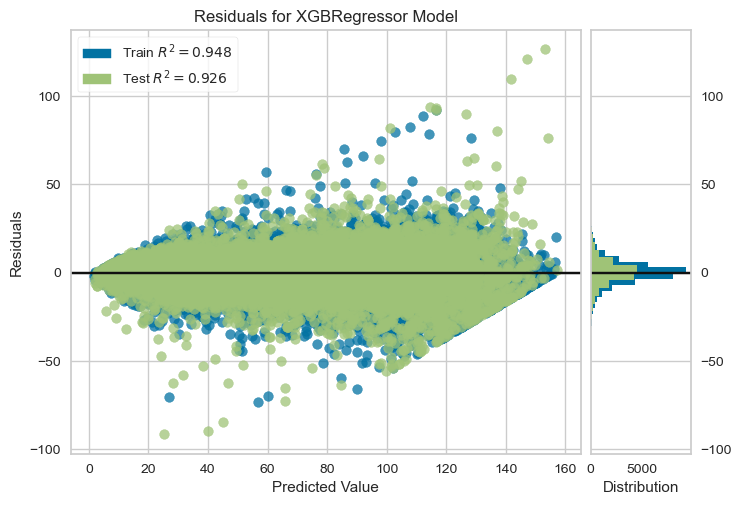

In [83]:

plot_model(model)
     

In [84]:
tuned_model = tune_model(model)


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,5.9070,77.9386,8.8283,0.9345,0.1838,0.1435
1,5.8637,77.7525,8.8177,0.9324,0.1887,0.1484
2,5.8936,84.7590,9.2065,0.9273,0.1901,0.1464
3,5.9029,86.2270,9.2858,0.9278,0.1970,0.1573
4,6.2991,97.2420,9.8611,0.9206,0.1914,0.1492
5,6.0694,85.1574,9.2281,0.9277,0.1971,0.1523
6,6.0947,85.3379,9.2379,0.9296,0.1891,0.1467
7,6.2301,90.9495,9.5367,0.9240,0.1923,0.1516
8,6.1839,90.4053,9.5082,0.9242,0.1851,0.1460


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [85]:
tuned_model

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.15, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             n_estimators=290, n_jobs=-1, num_parallel_tree=None,
             objective='reg:squarederror', predictor=None, ...)

In [86]:

predict_model(tuned_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting,5.9134,84.9387,9.2162,0.9290,0.1908,0.1487


,Year_prd,Year_model,Brand,Model,Mileage,CC,Fuel_CNG,Fuel_Diesel,Fuel_Gasoline,Fuel_Hybrid,Fuel_LPG,Price,prediction_label
595,2013,2010,11,65,106615,1598,0,0,1,0,0,63.570000,53.135101
40035,2008,2007,11,93,150000,1995,0,1,0,0,0,38.869999,36.275417
21423,2016,2013,11,93,107453,1197,0,0,1,0,0,88.269997,80.604355
14396,2007,2003,1,105,265000,1995,0,1,0,0,0,32.369999,30.954729
26676,2006,2004,4,49,238900,1560,0,1,0,0,0,8.840000,10.444991
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44435,2010,2006,12,41,160000,1229,0,0,1,0,0,18.200001,20.575804
47120,2004,2004,12,19,208023,1364,0,0,1,0,0,10.140000,11.479536
22151,2007,2004,0,9,292400,2698,0,1,0,0,0,31.070000,28.972317
42941,2004,2003,8,0,200000,1349,0,0,1,0,0,6.890000,7.474963


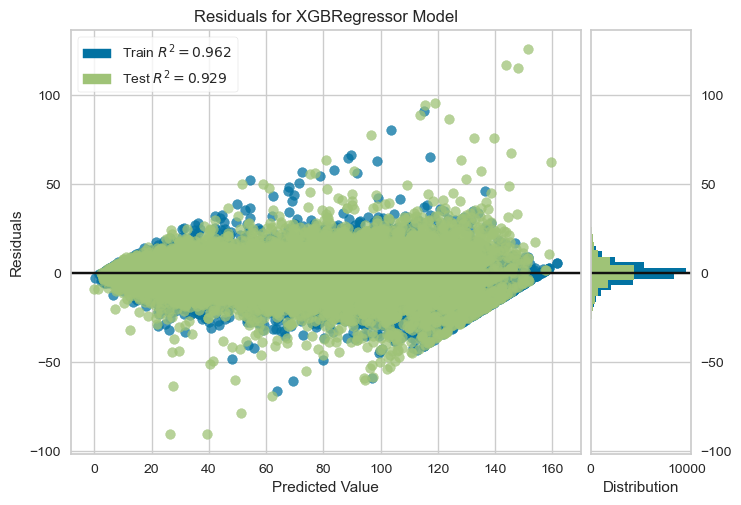

In [87]:

plot_model(tuned_model)

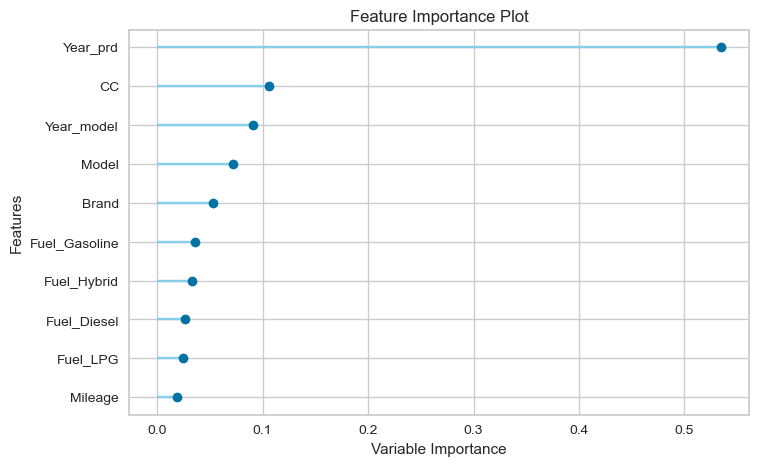

In [88]:
plot_model(tuned_model, plot='feature')

### 모델 블랜딩 1

In [54]:
# 방법 1
catboost = create_model('catboost')
# xgboost = create_model('xgboost')

blender_2 = blend_models(estimator_list = [catboost, xgboost_tuned_model])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,6.0591,85.9170,9.2691,0.9284,0.1956,0.1518
1,6.1498,90.5553,9.5161,0.9254,0.1953,0.1504
2,6.0830,88.6971,9.4179,0.9241,0.1915,0.1506
3,6.0140,93.6429,9.6769,0.9212,0.1986,0.1576
4,6.0712,86.8065,9.3170,0.9248,0.1906,0.1464
5,5.9431,81.6853,9.0380,0.9301,0.1950,0.1520
6,6.0704,83.2600,9.1247,0.9308,0.1934,0.1532
7,6.0358,87.3486,9.3460,0.9244,0.1999,0.1612
8,6.1919,85.2798,9.2347,0.9277,0.1914,0.1523


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,5.9467,84.2650,9.1796,0.9298,0.1924,0.1482
1,5.9947,86.6841,9.3104,0.9285,0.1908,0.1465
2,5.9295,85.6013,9.2521,0.9268,0.1871,0.1461
3,5.8705,90.3403,9.5048,0.9240,0.1929,0.1540
4,5.9182,83.3787,9.1312,0.9278,0.1857,0.1424
5,5.8188,78.1225,8.8387,0.9331,0.1900,0.1484
6,5.9827,81.4075,9.0226,0.9323,0.1885,0.1493
7,5.8878,85.4107,9.2418,0.9261,0.1943,0.1572
8,6.0580,82.7111,9.0946,0.9299,0.1853,0.1473


In [55]:
final_model = finalize_model(blender_2)
prediction = predict_model(final_model, data = test)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,5.8961,77.6180,8.8101,0.9364,0.1834,0.1429


### cat, xgb 튜닝 

In [52]:
catboost_tuned_model = tune_model(catboost)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,6.2562,90.2027,9.4975,0.9248,0.2038,0.1586
1,6.3955,97.4914,9.8738,0.9196,0.2055,0.1585
2,6.1734,91.1196,9.5457,0.9220,0.1943,0.1533
3,6.1923,97.2039,9.8592,0.9182,0.2017,0.1630
4,6.2544,91.9382,9.5884,0.9204,0.1991,0.1530
5,6.1893,84.8692,9.2124,0.9274,0.2012,0.1587
6,6.2924,87.7586,9.3680,0.9270,0.1988,0.1586
7,6.2493,92.7207,9.6292,0.9198,0.2052,0.1675
8,6.2950,88.0227,9.3820,0.9254,0.1975,0.1562


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [53]:
xgboost_tuned_model = tune_model(xgboost)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,6.0615,88.6537,9.4156,0.9261,0.1949,0.1503
1,6.0685,88.7694,9.4218,0.9268,0.1946,0.1486
2,6.0155,88.4480,9.4047,0.9243,0.1908,0.1480
3,5.9859,93.0759,9.6476,0.9217,0.1959,0.1567
4,5.9977,85.3427,9.2381,0.9261,0.1890,0.1440
5,5.9204,80.5655,8.9758,0.9311,0.1926,0.1507
6,6.1223,85.6635,9.2555,0.9288,0.1909,0.1507
7,5.9816,89.0028,9.4341,0.9230,0.1967,0.1586
8,6.1341,85.9664,9.2718,0.9272,0.1862,0.1476


Fitting 10 folds for each of 10 candidates, totalling 100 fits


### 모델 블랜딩 2

In [50]:
# 방법 2
best_model_5 = compare_models(n_select=5)
blender_5 = blend_models(best_model_5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,6.0538,86.5814,9.3030,0.9266,0.1940,0.1523,0.3510
xgboost,Extreme Gradient Boosting,6.2228,91.4684,9.5624,0.9224,0.1965,0.1549,0.2970
lightgbm,Light Gradient Boosting Machine,6.5410,96.7676,9.8346,0.9179,0.2065,0.1674,0.3150
rf,Random Forest Regressor,6.4828,101.7341,10.0839,0.9137,0.2016,0.1598,0.5150
et,Extra Trees Regressor,6.8146,112.1760,10.5890,0.9048,0.2107,0.1665,0.6370
gbr,Gradient Boosting Regressor,8.3228,146.3716,12.0963,0.8758,0.2488,0.2117,0.3140
dt,Decision Tree Regressor,8.3299,175.1186,13.2309,0.8514,0.2625,0.1998,0.2940
ridge,Ridge Regression,13.1624,311.0309,17.6349,0.7362,0.4480,0.4167,0.2960
lr,Linear Regression,13.1624,311.0317,17.6349,0.7362,0.4480,0.4167,0.2970
br,Bayesian Ridge,13.1632,311.0353,17.6350,0.7362,0.4480,0.4167,0.3150


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,6.0298,85.6183,9.2530,0.9286,0.1904,0.1490
1,6.1296,91.3378,9.5571,0.9247,0.1928,0.1497
2,6.0175,87.7921,9.3697,0.9249,0.1861,0.1466
3,5.9828,95.0258,9.7481,0.9201,0.1938,0.1565
4,5.9712,84.8102,9.2092,0.9266,0.1855,0.1441
5,5.8732,80.1928,8.9550,0.9314,0.1884,0.1484
6,6.0639,84.4732,9.1909,0.9298,0.1886,0.1507
7,5.9909,88.1151,9.3870,0.9238,0.1937,0.1590
8,6.1403,85.3892,9.2406,0.9276,0.1877,0.1500


In [51]:
final_model = finalize_model(blender_5)
prediction = predict_model(final_model, data = test)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,5.9002,79.9560,8.9418,0.9345,0.1820,0.1429


In [94]:
test = pd.read_csv('test.csv')
test

,ID,생산년도,모델출시년도,브랜드,차량모델명,판매도시,판매구역,주행거리,배기량,압축천연가스(CNG),경유,가솔린,하이브리드,액화석유가스(LPG)
0,TEST_00000,2017,2013,mazda,3,KAL,WIE,57000,1998,0,0,1,0,0
1,TEST_00001,2011,2008,ford,fiesta,ROP,POD,159000,1242,0,0,1,0,0
2,TEST_00002,2019,2017,volkswagen,polo,LOD,LOD,11284,999,0,0,1,0,0
3,TEST_00003,2021,2016,renault,megane,JAW,SLA,9,1332,0,0,1,0,0
4,TEST_00004,2010,2011,volvo,v60,WEJ,POM,270000,1999,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14475,TEST_14475,2012,2008,honda,jazz,PIA,MAZ,77405,1339,0,0,1,0,0
14476,TEST_14476,2011,2008,renault,kangoo,MJU,POM,228559,1461,0,1,0,0,0
14477,TEST_14477,2018,2012,toyota,auris,POO,DOL,17412,1798,0,0,0,1,0
14478,TEST_14478,2017,2008,renault,megane,WAR,MAZ,193000,1461,0,1,0,0,0


In [96]:
test10

,Year_prd,Year_model,Brand,Model,Mileage,CC,Fuel_CNG,Fuel_Diesel,Fuel_Gasoline,Fuel_Hybrid,Fuel_LPG
0,2017,2013,8,1,57000,1998,0,0,1,0,0
1,2011,2008,4,48,159000,1242,0,0,1,0,0
2,2019,2017,18,85,11284,999,0,0,1,0,0
3,2021,2016,14,72,9,1332,0,0,1,0,0
4,2010,2011,19,127,270000,1999,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
14475,2012,2008,5,61,77405,1339,0,0,1,0,0
14476,2011,2008,14,65,228559,1461,0,1,0,0,0
14477,2018,2012,17,20,17412,1798,0,0,0,1,0
14478,2017,2008,14,72,193000,1461,0,1,0,0,0


In [109]:
final_model = finalize_model(blender_5)
prediction = predict_model(final_model, data = test)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,5.9543,80.8758,8.9931,0.9326,0.1785,0.1405


In [111]:
prediction = predict_model(final_model, data = test10)

In [110]:
final_model

Pipeline(memory=FastMemory(location=C:\Users\user\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Year_prd', 'Year_model', 'Brand',
                                             'Model', 'Mileage', 'CC',
                                             'Fuel_CNG', 'Fuel_Diesel',
                                             'Fuel_Gasoline', 'Fuel_Hybrid',
                                             'Fuel_LPG'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty...
                                              ExtraTreesRegressor(bootstrap=False,
                                                                  ccp_alpha=0.0,
                                                                  criterion='squared_error',
                                                                  max_depth=None,
                                                                  max_features=1.0,
                                                                  max_leaf_nodes=None,
                                                                  max_samples=None,
                                                                  min_impurity_decrease=0.0,
                                                                  min_samples_leaf=1,
                                                                  min_samples_split=2,
                                                                  min_weight_fraction_leaf=0.0,
                                                                  n_estimators=100,
                                                                  n_jobs=-1,
                                                                  oob_score=False,
                                                                  random_state=123,
                                                                  verbose=0,
                                                                  warm_start=False))],
                                 n_jobs=-1, verbose=False, weights=None))],
         verbose=False)